In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics as st

In [2]:
df=pd.read_csv('zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

Dropping Unwanted columns

In [5]:
df.drop(['url','address','reviews_list','menu_item','dish_liked','phone','rest_type'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   cuisines                     51672 non-null  object
 7   approx_cost(for two people)  51371 non-null  object
 8   listed_in(type)              51717 non-null  object
 9   listed_in(city)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


Checking Duplicates and dropping it

In [7]:
df.duplicated().sum()

108

In [8]:
df.drop_duplicates(keep='first',inplace=True)
df.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7755
votes                             0
location                         21
cuisines                         45
approx_cost(for two people)     344
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

Cleaning Rate column

In [9]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
df.rate=df.rate.replace(['NEW','-'],np.nan)

In [11]:
df.rate=df.rate.str.replace('/5','')
df.rate=df.rate.str.replace(' ','')

In [12]:
df.rate=df.rate.astype('float64')

In [13]:
df['rate'].fillna(df['rate'].mean(), inplace = True)
df['rate'].isnull().sum()

0

In [14]:
df.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        21
cuisines                        45
approx_cost(for two people)    344
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

Cleaning approx_cost Column

In [15]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].str.replace(',','')
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', nan, '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [16]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype('float64')
df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].mean(), inplace = True)
df['approx_cost(for two people)'].isnull().sum()

0

Dropping Null Values

In [17]:
df.dropna(inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51564 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51564 non-null  object 
 1   online_order                 51564 non-null  object 
 2   book_table                   51564 non-null  object 
 3   rate                         51564 non-null  float64
 4   votes                        51564 non-null  int64  
 5   location                     51564 non-null  object 
 6   cuisines                     51564 non-null  object 
 7   approx_cost(for two people)  51564 non-null  float64
 8   listed_in(type)              51564 non-null  object 
 9   listed_in(city)              51564 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


Since Location and Listed_city are same dropping any one of the columns

In [19]:
df.drop('listed_in(city)',inplace=True,axis=1)

Renaming the columns

In [20]:
df.rename(columns = {'approx_cost(for two people)':'Cost2plates', 'listed_in(type)':'Types'}, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51564 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51564 non-null  object 
 1   online_order  51564 non-null  object 
 2   book_table    51564 non-null  object 
 3   rate          51564 non-null  float64
 4   votes         51564 non-null  int64  
 5   location      51564 non-null  object 
 6   cuisines      51564 non-null  object 
 7   Cost2plates   51564 non-null  float64
 8   Types         51564 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.9+ MB


Dropping Duplicates after cleaning

In [22]:
df.duplicated().sum()

19704

In [23]:
df.drop_duplicates(keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31860 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          31860 non-null  object 
 1   online_order  31860 non-null  object 
 2   book_table    31860 non-null  object 
 3   rate          31860 non-null  float64
 4   votes         31860 non-null  int64  
 5   location      31860 non-null  object 
 6   cuisines      31860 non-null  object 
 7   Cost2plates   31860 non-null  float64
 8   Types         31860 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 2.4+ MB


Univariant Analysis

In [24]:
def cat(i):
    sns.countplot(data=df,x=i)

Online_Order

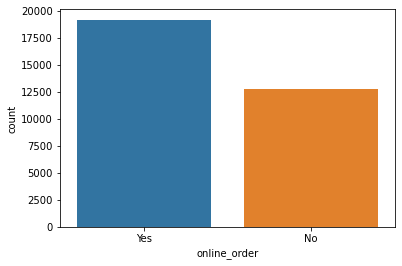

In [25]:
cat('online_order')

There is high percentage of people who order online then dining out

Book_Table

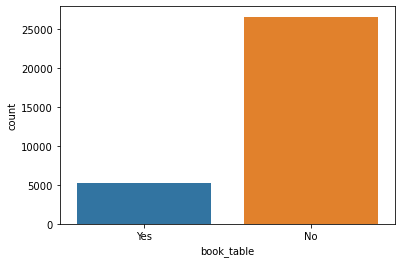

In [26]:
cat('book_table')

Since the percentage of online_order is high obvious the there will no booking of table. but in no online order we can see that people prefer to take diliver from the resturent than dining

Types of resturents

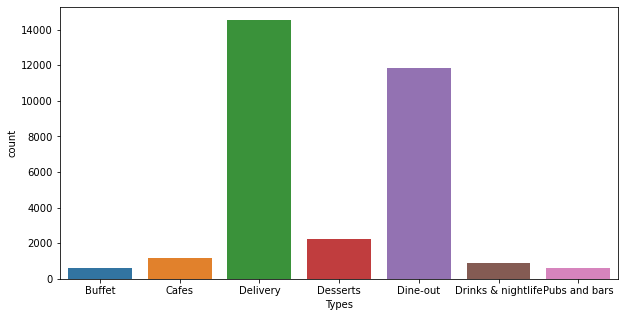

In [27]:
plt.figure(figsize=(10,5))
cat('Types')

Most of the restuents listed in zomato are cloud kitchens or small road side hotels

Votes

<AxesSubplot:xlabel='votes'>

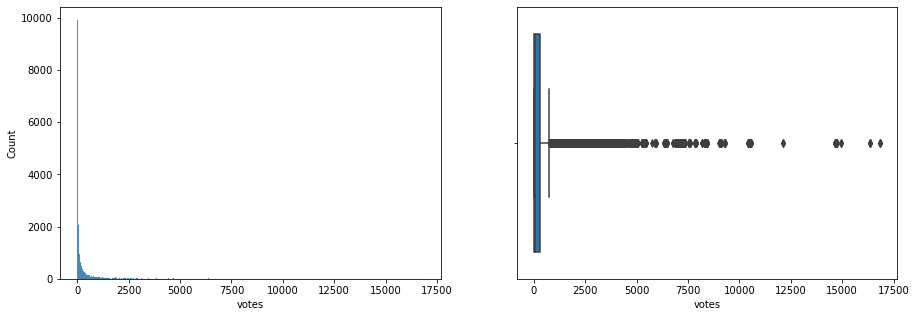

In [28]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.histplot(data=df,x="votes",ax=ax[0])
sns.boxplot(data=df,x="votes",ax=ax[1])

Most of the resturents does not have votes

Rate

<AxesSubplot:xlabel='rate'>

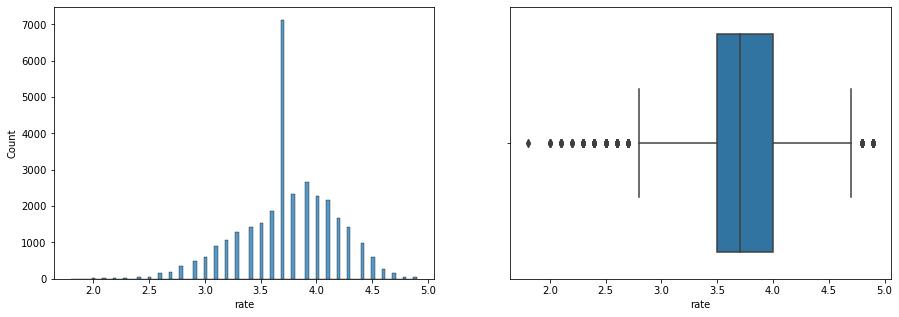

In [29]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.histplot(data=df,x="rate",ax=ax[0])
sns.boxplot(data=df,x="rate",ax=ax[1])

Highest number of rating given to the resturent by customer is in the range of 3.5 to 4

Cost2plates

<AxesSubplot:xlabel='Cost2plates'>

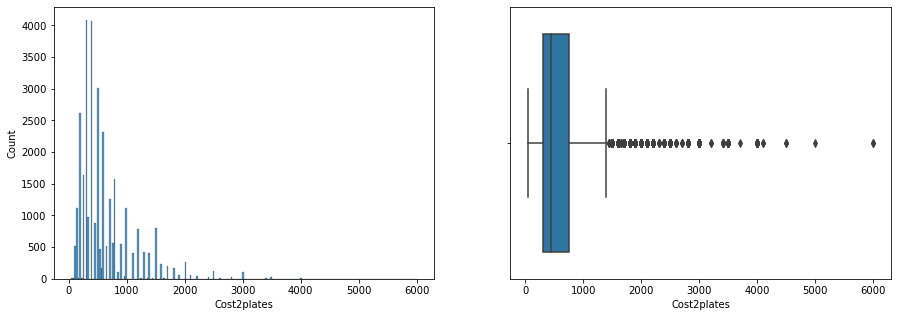

In [30]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.histplot(data=df,x="Cost2plates",ax=ax[0])
sns.boxplot(data=df,x="Cost2plates",ax=ax[1])

Most of the resturent price per 2 plates lies between 50 to 800 rs

Bivariant

<AxesSubplot:xlabel='online_order', ylabel='Cost2plates'>

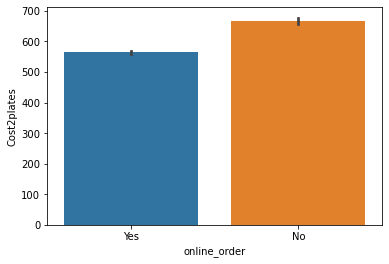

In [31]:
sns.barplot(data=df,x='online_order',y='Cost2plates')

Online order is more cheaper then dining out

<AxesSubplot:xlabel='book_table', ylabel='Cost2plates'>

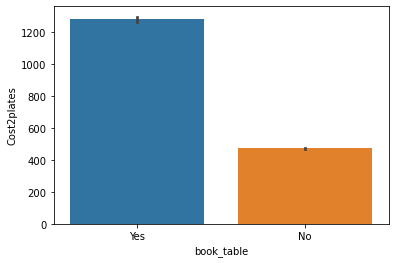

In [32]:
sns.barplot(data=df,x='book_table',y='Cost2plates')

Booking table and eating out is more costlier then taking parcel

<AxesSubplot:xlabel='Types', ylabel='Cost2plates'>

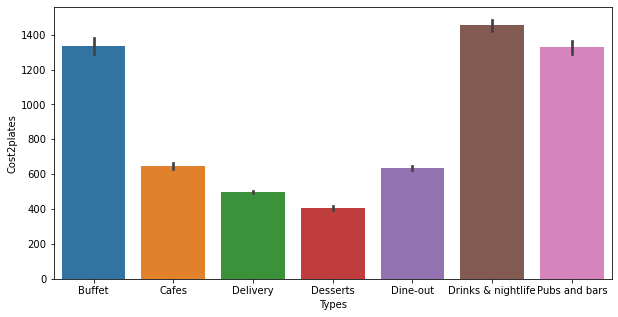

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Types',y='Cost2plates')

The cost of bars, buffets are expensive

<AxesSubplot:xlabel='votes', ylabel='Cost2plates'>

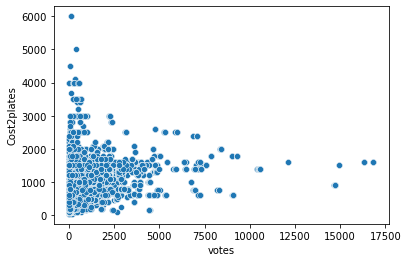

In [34]:
sns.scatterplot(data=df,x='votes',y='Cost2plates')

Most of the people voted high for Average cost of food 

<AxesSubplot:xlabel='rate', ylabel='Cost2plates'>

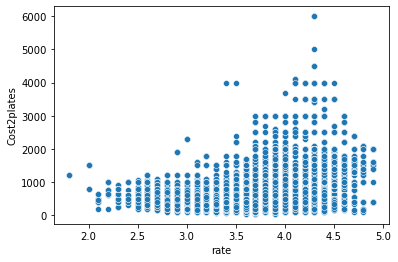

In [35]:
sns.scatterplot(data=df,x='rate',y='Cost2plates')

People have given good reviews for the avg food cost since it satisfy all the condition of the people

Multivariant analysis 

<AxesSubplot:xlabel='Types', ylabel='Cost2plates'>

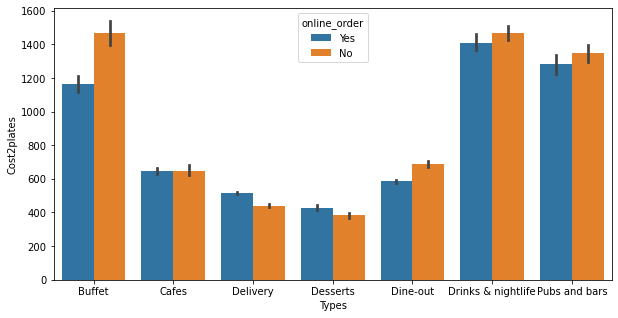

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Types',y='Cost2plates',hue='online_order')

People like to order online where resturent has delivery option.

People like to order desert online.

<AxesSubplot:xlabel='votes', ylabel='Cost2plates'>

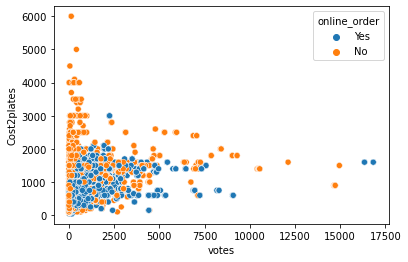

In [39]:
sns.scatterplot(data=df,x='votes',y='Cost2plates',hue='online_order')

People who prefer to dine out never vote. then people order online.

<AxesSubplot:xlabel='rate', ylabel='Cost2plates'>

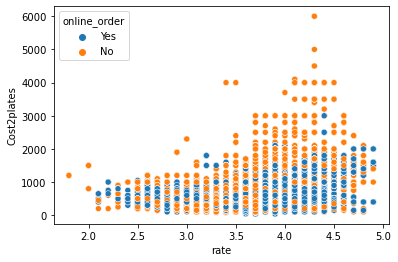

In [40]:
sns.scatterplot(data=df,x='rate',y='Cost2plates',hue='online_order')

Resturent aceepting the online order has high rating as well as the cheaper rate then the resturent with no online order.

Exporting the cleaned data set to csv file

In [36]:
# df.to_csv('Cleaned_Zomato.csv')